# Описание проекта:
  Проект посвящен исследовательскому анализу данных влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике. Проведение анализа данных необходимо для дальнейшего построения модели прогнозирования успеваемости учащихся и выявления студентов, находящихся в группе риска. Будущая модель необходима для предсказания  результатов госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели необходимо провести разведывательный анализ данных и составить отчёт по его результатам. 

# Цели и задачи проекта:
Целью данного проекта является получение обработанного массива данных для построения прогнозной модели по улучшению благополучия детей по всему миру.
Перед командой проекта посталены следующие задачи:
1. Провести анализ полученных от UNICEF данных по успеваемости учащихся
2. Провести первичную обработку данных
3. Посмотреть на распределение признаков для числовых переменных, устранить выбросы
4. Оценить количество уникальных значений для номинативных переменных
5. По необходимости преобразовать данные
6. Провести корреляционный анализ количественных переменных
7. Отобрать не коррелирующие переменные
8. Проанализировать номинативные переменные и устраните те, которые не влияют на предсказываемую величину
9. Сформулировать выводы относительно качества данных и тех переменных, которые будут использованы в дальнейшем для построении модели

# Краткое описание полученных данных:
1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

# Поэтапное выполнение работы:
1. Проводим анализ каждого столбца
2. По возможности заполняем пропущенные данные
3. Проводим корреляционный анализ для числовых параметров
4. Проводим анализ номинативных параметров
5. Формируем массив для построения модели

### Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
edu_df = pd.read_csv('stud_math.csv')

###### Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов: 

In [350]:
display(edu_df.head(25))
edu_df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

##### Краткое описание полученного массива данных:
- Полученный массив данных содержит 30 столбцов с различного рода информацией
- Полученный массив данных содержит 395 записей (строк)
- Полученный массив данных содержит 13 числовых столбцов (характеристик) и 17 строковых столбцов (характеристик)
- 3 столбца (наименование школы, возраст и пол ученика) полностью заполнены данными, в остальных столбцах есть пропуски информации
- В столбце "проходной балл", который является основополагающим при проведении дальнейшего исследования заполнены 389 строк из 395 (6 значений отсутствует)
- Массив содержит похожие наименования столбцов "studytime" и "studytime, granular". Требуется определить дублирование информации в данных столбцах
- Наименования столбцов не требуют переименовая и удобны для работы с ними

##### Предлагается для начала рассмотреть все столбцы по отдельности: 

GP    349
MS     46
Name: school, dtype: int64

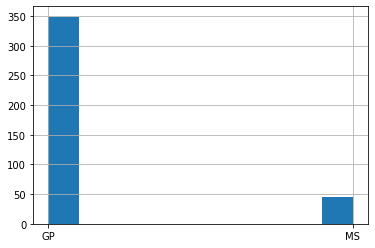

In [351]:
display(edu_df.school.value_counts())
display(edu_df.school.hist())

#### Столбец наименования (код) школы, в которой учится студент:
- Исходя из полученной информации можно сделать вывод, что предоставленный массив данных содержит информацию из 2-х школ. Большинство исследуемых студентов учится в школе с кодом GP.
- Поскольку целью проекта является подготовка данных для построения модели по улучшению благополучия детей по всему миру, а не исследование качества обучения в той или иной школе, то данный столбец не имеет влияния на общую модель данных и его можно удалить. 

In [352]:
edu_df.drop(['school'], inplace=True, axis=1)

#### Рассмотрим столбец "score" 

In [353]:
edu_df[edu_df.score.isnull()]

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,F,16,U,GT3,T,2.0,3.0,other,other,reputation,...,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,F,18,U,GT3,T,2.0,1.0,other,other,course,...,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,F,19,NaN,GT3,T,3.0,3.0,other,services,home,...,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,F,18,U,GT3,T,1.0,1.0,other,other,home,...,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,M,19,U,GT3,T,1.0,2.0,other,services,course,...,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,M,19,NaN,GT3,T,1.0,1.0,other,services,home,...,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


 - Столбец содержит 6 строк с отсутствующими значениями.
 - Количество отсутствующих значений менее 1.5% от общего количества данных в массиве.
 - Принимая во внимание факт того, что потенциально влияющие на балл параметры (количество пропусков итд.) принимают для этих строк различные значения, то заполнение средним значением данных ячеек является нецелесообразным.
 - В рамках исследования данных принято решение об удалении данных строк. (на основании вышеизложенных фактов)

In [354]:
edu_df.dropna(subset=['score'], inplace=True)

Посмотрим на распределение представленных в масиве данных о полученном балле по математике: 

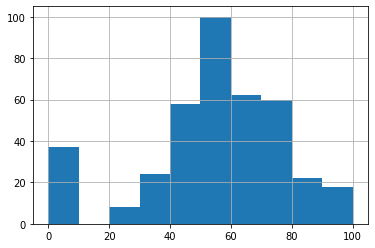

In [355]:
edu_df.score.hist()

Из полученной гистограммы видно, что по большей части данные баллов распределены нормально, при этом имеются нулевые значения. Посмотрим на нулевые данные отдельно:

In [356]:
display(edu_df[edu_df.score == 0])
display(edu_df[edu_df.score == 0].absences.value_counts())
display(edu_df[edu_df.score == 0].health.value_counts())

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,...,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,F,15,R,GT3,T,3.0,4.0,services,teacher,course,...,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,...,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,...,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,F,15,U,GT3,T,4.0,4.0,services,NaN,course,...,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,M,17,R,GT3,T,3.0,4.0,at_home,other,course,...,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,F,16,U,GT3,A,3.0,NaN,other,other,NaN,...,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,...,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,M,17,U,GT3,T,2.0,1.0,other,other,home,...,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,F,15,U,GT3,T,3.0,2.0,health,services,home,...,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


0.0    36
Name: absences, dtype: int64

5.0    13
3.0     7
4.0     7
2.0     6
1.0     2
Name: health, dtype: int64

Строк с нулевыми данным - 37. При этом данные о пропусках занятий также нулевые. Такой факт является достаточно странным (Студент не пропускал занятия, по большей части имеет выcокий уровень здоровья). В рамках текущего проекта делается вывод, что информация по данным студентам по какой-либо причине не была корректно заполнена в учетной системе. Чтобы провести анализ данной гипотезы выделим такие данные в отдельный массив и проведем его исследование на последующих стадиях (построения модели). Массив назовем edu_df_nullscore.
Из основного массива строки с нулевым значением score удалим для построения в дальнейшем более точной модели.
При подтверждении гипотезы (на последующих стадиях) о некорректности заполнения данных в учетной системе, нулевые значения заполним средним и проведем повторное прогнозное моделирование.

In [357]:
edu_df_nullscore = edu_df[edu_df.score == 0]

In [358]:
edu_df.drop(edu_df[edu_df.score == 0].index, inplace=True)

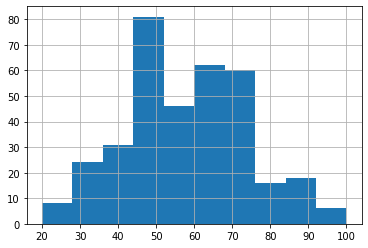

In [359]:
edu_df.score.hist()

После очистки данных мы получили массив с 352 строками с не нулевыми значениями score. Из данных понятно, что студенты оцениваются по 100 бальной шкале (от 0 до 100 баллов). Полученное распределение поддается логике. Выбросы в данном столбце отсутствуют.

### Рассмотрим столбец "пол" (sex)
- Данный столбец не содержит пропусков значений
- Данный столбец содержит 2 значения F(женщина) и М (Мужчина)

In [360]:
edu_df.sex.value_counts()

F    182
M    170
Name: sex, dtype: int64

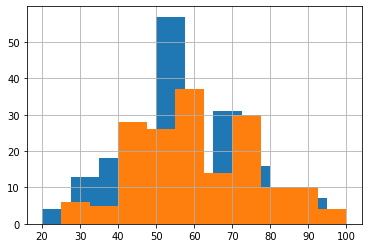

In [361]:
display(edu_df[edu_df.sex == 'F'].score.hist())
display(edu_df[edu_df.sex == 'M'].score.hist())

In [362]:
display(edu_df[edu_df.sex == 'F'].score.describe())
display(edu_df[edu_df.sex == 'M'].score.describe())

count    182.000000
mean      56.153846
std       15.969185
min       20.000000
25%       45.000000
50%       55.000000
75%       68.750000
max       95.000000
Name: score, dtype: float64

count    170.000000
mean      59.470588
std       16.318275
min       25.000000
25%       50.000000
50%       60.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

###### Исходя из проведенного анализа можно сделать промежуточные выводы:
- в приведенном массиве данных количество обучаемых различного пола примерно одинаково
- Распределение итогового балла в зависимости от пола также единообразно
- Ввиду того, что отсутствует необхоимость дальнейшего построения модели предсказания результатов экзамена по гендерному призанаку, данный столбец можно удалить.

In [363]:
edu_df.drop(['sex'], inplace=True, axis=1)

### Рассмотрим столбцы  "studytime" и "studytime, granular"

In [364]:
edu_df_studytime = edu_df[['studytime', 'studytime, granular']]
edu_df_studytime

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


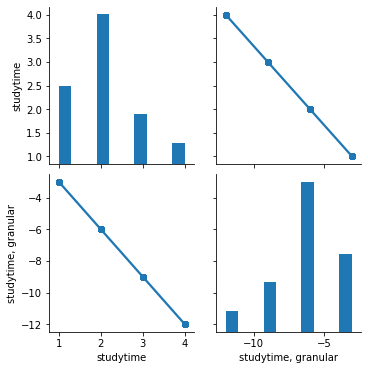

In [365]:
sns.pairplot(edu_df_studytime, kind='reg')

- Рассматриваемые столбцы линейно зависимы между собой. Поэтому один из этих столбцов можно удалить. Удалим столбец "studytime, granular" 

In [366]:
edu_df.drop(['studytime, granular'], inplace=True, axis=1)

#### Рассмотрим оставшийся столбец "studytime"
- Столбец имеет 7 пропущенных значений. Ввиду того, что количество самого частого значения в 2 раза превышает 2-е по частоте значение (при этом занимает половину всех значений), и количество пропусков несравнимо мало (<2%), предлагается заполнить пустые ячейки самым популярным значением (модой) = 2.

- Выбросы в данном столбце отсутствуют.

In [367]:
edu_df.studytime.value_counts()

2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

In [368]:
stats.mode(edu_df.studytime, axis=0)

ModeResult(mode=array([2.]), count=array([173]))

Заполним пропущенные значения модой = 2

In [369]:
edu_df.studytime.fillna(2, inplace=True)

#### Рассмотрим оставшийся столбец "address"

In [370]:
edu_df.address.value_counts()

U    265
R     73
Name: address, dtype: int64

In [371]:
edu_df[edu_df.address.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,...,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,...,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,...,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,16,NaN,LE3,T,NaN,1.0,other,other,home,father,...,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,...,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,16,NaN,GT3,T,3.0,NaN,other,services,course,father,...,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
241,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,...,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,...,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
292,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,...,yes,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0
348,17,NaN,GT3,T,4.0,3.0,health,other,reputation,mother,...,yes,yes,yes,yes,NaN,4.0,3.0,4.0,0.0,75.0


Рассматриваемый столбец имеет 14 строк с незаполненными занчениями. Посмотрим на остальные данные и наличие выбросов (нерегламентированных) значений в массиве

U    265
R     73
Name: address, dtype: int64

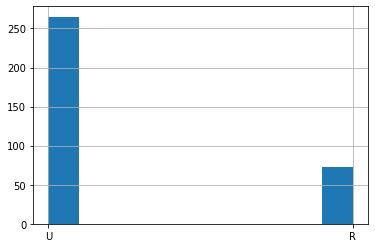

In [372]:
display(edu_df.address.value_counts())
display(edu_df.address.hist())

- исходя из проведенного анализа, большинство исследуемых студентов живет в городе. Поскольку кроме вариантов "город" или "загород" других значений нет, то заполнить значением "не указано" не представляется возможным.
- 3/4 значений соответствуют городским жителям, поэтому предлагается заполнить 14 пустых строк значением "U" - город.

In [373]:
edu_df.address.fillna('U', inplace=True)

#### Рассмотрим столбец "famsize"

GT3    228
LE3    100
Name: famsize, dtype: int64

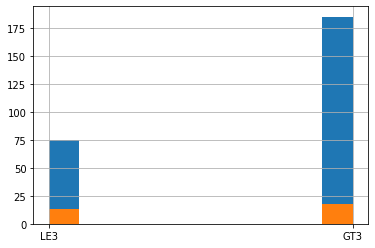

In [374]:
display(edu_df.famsize.value_counts())
display(edu_df[edu_df.Pstatus == 'T'].famsize.hist())
display(edu_df[edu_df.Pstatus == 'A'].famsize.hist())

- Большинство исследуемых студентов имеют семьи размером более 3-х человек. При этом размер семьи не зависит от того живут родители студента раздельно или нет. В связи с тем, что преобладает (в 2.5 раза) количество семей размером более 3-х человек.
- Посмотрим на количество пустых значений и если их количество незначительно по сравнению с общей выборкой, заполним пустые значения наиболее повторяющимся значением.
- Выбросы отсутствуют

In [375]:
edu_df[edu_df.famsize.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,...,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,...,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
36,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,...,yes,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,...,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,17,U,NaN,T,2.0,1.0,other,other,home,mother,...,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,...,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
114,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,...,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
129,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,...,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
167,16,U,NaN,T,4.0,2.0,health,services,home,father,...,yes,yes,yes,yes,4.0,2.0,3.0,3.0,0.0,80.0


- Количество пропущенных значений равняется 24 (<7%). принимаем решение о заполнении значением GT3

In [376]:
edu_df.famsize.fillna('GT3', inplace=True)

### Рассмотрим столбец "Pstatus"

In [377]:
edu_df.Pstatus.value_counts()

T    277
A     34
Name: Pstatus, dtype: int64

In [378]:
edu_df[edu_df.Pstatus.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
1,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
9,15,U,GT3,NaN,3.0,4.0,other,other,home,mother,...,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
11,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,...,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
15,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,...,yes,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
25,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,...,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
28,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,...,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
54,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,...,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
63,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,...,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
67,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,...,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
81,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,...,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


- Большинство исследуемых студентов  живет в полноценной семье (мать, отец)
- Отсутствуют заявленные в описании массива данные
- Имеется 41 незаполненое поле по данному столбцу.
- Поскольку количество незаполненых данных достаточно большое, то предлагается ввести новый показатель "no data" и заполнить им поля.

In [379]:
edu_df.Pstatus.fillna('no data', inplace=True)

#### Рассмотрим столбец "Medu"

In [380]:
edu_df.Medu.value_counts()

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: Medu, dtype: int64

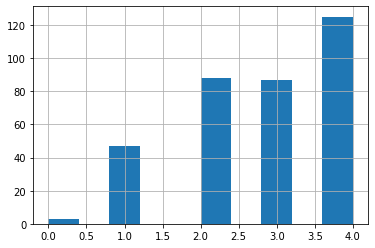

In [381]:
edu_df.Medu.hist()

- Большинство матерей исследуемых студентов имеют высшее образование
- Имеются 2 незаполненых значения
- Выбросы отсутствуют
- Заполним отсутствующие значения медианой/средним (в данном случае они примерно равны)

In [382]:
print(round(edu_df.Medu.mean(), 0))
print(edu_df.Medu.median())

3.0
3.0


In [383]:
edu_df[edu_df.Medu.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,16,U,LE3,T,NaN,1.0,other,other,home,father,...,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,16,R,GT3,no data,NaN,3.0,services,services,reputation,mother,...,yes,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0


In [384]:
edu_df.Medu.fillna(3.0, inplace=True)

#### Рассмотрим столбец "Fedu"

In [385]:
edu_df.Fedu.value_counts()

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: Fedu, dtype: int64

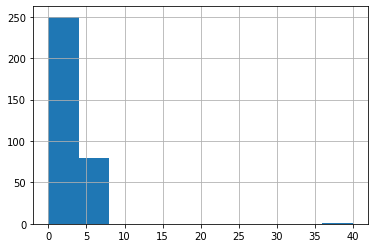

In [386]:
edu_df.Fedu.hist()

In [387]:
edu_df[edu_df.Fedu.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,15,U,GT3,T,4.0,NaN,health,health,other,father,...,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,15,U,GT3,T,4.0,NaN,services,teacher,course,father,...,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,16,U,LE3,A,3.0,NaN,other,services,home,mother,...,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,...,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,15,U,LE3,T,1.0,NaN,other,at_home,home,father,...,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,16,U,GT3,no data,3.0,NaN,services,other,course,mother,...,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
142,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,...,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,16,U,GT3,T,3.0,NaN,other,services,course,father,...,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,...,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0
180,16,U,GT3,T,4.0,NaN,teacher,other,home,mother,...,yes,yes,yes,no,3.0,4.0,3.0,3.0,10.0,40.0


In [388]:
print(round(edu_df.Fedu.mean(), 0))
print(edu_df.Fedu.median())

3.0
3.0


- Отцы исследуемых студентов имеют примерно равное распределение по категориям образования
- Имеется 21 незаполненое значение
- Выбросы присутствуют (ошибочно введено значение 40.0). Поскольку введено одно такое значение, предполагаем, что ввели лишний "0". Заменим это значение на 4.0.
- Заполним отсутствующие значения медианой/средним (в данном случае они примерно равны)

In [389]:
edu_df.Fedu.replace(40.0, 4.0, inplace=True)

In [390]:
edu_df.Medu.fillna(3.0, inplace=True)

#### Рассмотрим столбец "Mjob"

In [391]:
edu_df.Mjob.value_counts()

other       115
services     90
teacher      51
at_home      49
health       30
Name: Mjob, dtype: int64

In [392]:
edu_df[edu_df.Mjob.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,...,yes,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,15,U,LE3,no data,3.0,3.0,NaN,other,other,mother,...,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,...,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,...,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,...,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
145,15,U,GT3,T,1.0,1.0,NaN,services,course,father,...,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,...,yes,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,16,U,GT3,T,2.0,2.0,NaN,other,course,father,...,yes,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,16,U,LE3,no data,3.0,3.0,NaN,other,reputation,mother,...,yes,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0
177,17,U,GT3,T,3.0,3.0,NaN,other,reputation,father,...,no,yes,yes,no,4.0,3.0,4.0,4.0,4.0,30.0


- Большинство матерей изучаемых студентов имеют иную провессию
- Непредусмотренные значения в столбце отсутствуют
- Имеется 17 незаполненых столбцов
- Незаполненые столбцы предлагается заполнить значением "other" по причине популярности значения + такой подход не нарушит структуру исследования

In [393]:
edu_df.Mjob.fillna('other', inplace=True)

#### Рассмотрим столбец "Fjob"

In [394]:
edu_df.Mjob.value_counts()

other       132
services     90
teacher      51
at_home      49
health       30
Name: Mjob, dtype: int64

In [395]:
edu_df[edu_df.Mjob.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


- Большинство отцов изучаемых студентов имеют иную провессию
- Непредусмотренные значения в столбце отсутствуют
- Имеется 0 незаполненых столбцов

#### Рассмотрим столбец "reason"

In [396]:
edu_df.reason.value_counts()

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

In [397]:
edu_df[edu_df.reason.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
33,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,...,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,16,U,GT3,no data,4.0,3.0,teacher,health,NaN,mother,...,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,...,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,...,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,16,U,GT3,no data,2.0,2.0,at_home,other,NaN,mother,...,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
138,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,...,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
185,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,...,yes,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,16,U,GT3,no data,1.0,2.0,services,services,NaN,mother,...,yes,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0
196,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,...,yes,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0
263,17,U,GT3,T,3.0,3.0,other,other,NaN,mother,...,no,yes,no,no,3.0,2.0,3.0,4.0,4.0,45.0


- Большинство  студентов выбрали школу по критерию "образовательная программа"
- Непредусмотренные значения в столбце отсутствуют
- Имеется 15 незаполненых столбцов
- Пустые столбцы заполним значением моды = course

In [398]:
edu_df.reason.fillna('course', inplace=True)

#### Рассмотрим столбец "guardian"

In [399]:
edu_df.guardian.value_counts()

mother    225
father     78
other      20
Name: guardian, dtype: int64

In [400]:
edu_df[edu_df.guardian.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,15,R,GT3,T,3.0,4.0,services,health,course,NaN,...,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,...,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,...,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,15,U,GT3,T,4.0,4.0,services,services,course,NaN,...,yes,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,...,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,15,U,GT3,no data,2.0,3.0,other,other,home,NaN,...,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,16,U,GT3,T,3.0,3.0,other,other,home,NaN,...,yes,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,...,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,16,U,LE3,T,1.0,1.0,services,other,course,NaN,...,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
164,17,R,LE3,T,1.0,1.0,other,services,course,NaN,...,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0


- Большинство  студентов воспитываются матерями
- Непредусмотренные значения в столбце отсутствуют
- Имеется 29 незаполненых столбцов
- Пустые столбцы заполним значением моды = mother (Согласно практике опекунами чаще являются матери)

In [401]:
edu_df.guardian.fillna('mother', inplace=True)

#### Рассмотрим столбец "traveltime"

In [402]:
edu_df.traveltime.value_counts()

1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

In [403]:
edu_df[edu_df.traveltime.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,...,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,15,U,GT3,T,4.0,4.0,health,services,home,mother,...,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,15,U,GT3,T,2.0,3.0,other,other,other,father,...,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,...,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,16,U,GT3,T,4.0,2.0,other,NaN,course,mother,...,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,...,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,16,U,GT3,T,3.0,1.0,other,other,reputation,father,...,yes,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,15,U,GT3,A,3.0,4.0,other,other,course,mother,...,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,16,U,GT3,no data,2.0,2.0,at_home,other,course,mother,...,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,17,U,LE3,T,2.0,2.0,other,other,course,father,...,yes,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


In [404]:
print(edu_df.traveltime.median())
print(round(edu_df.traveltime.mean(), 0))

1.0
1.0


- Преобладающему количеству студентов добираться до школы менее 15 минут
- непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 23 шт.
- Заполним пропуски медианой/средним/модой, в текущем массиве они совпадают

In [405]:
edu_df.traveltime.fillna(1.0, inplace=True)

#### Рассмотрим столбец "failures"

In [406]:
edu_df.failures.value_counts()

0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

In [407]:
edu_df[edu_df.failures.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,15,U,GT3,T,4.0,NaN,health,health,other,father,...,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,...,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,15,U,LE3,no data,3.0,3.0,other,other,other,mother,...,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,...,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,...,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,16,U,GT3,T,3.0,3.0,services,NaN,home,father,...,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,15,R,GT3,no data,4.0,4.0,other,other,home,father,...,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,15,R,GT3,T,2.0,1.0,health,services,reputation,mother,...,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,...,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,15,U,GT3,T,3.0,4.0,services,services,home,father,...,yes,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


In [408]:
round(edu_df.failures.mean(), 0)

0.0

- У Преобладающего количества студентов отсутствуют внеучебные неудачи (>77%)
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 20 шт.
- Заполним пропуски средним значением/модой, в данном случае они совпадают

In [409]:
edu_df.failures.fillna(0.0, inplace=True)

#### Рассмотрим столбец "schoolsup"

In [410]:
edu_df.schoolsup.value_counts()

no     295
yes     48
Name: schoolsup, dtype: int64

In [411]:
edu_df[edu_df.schoolsup.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,15,U,GT3,T,4.0,2.0,health,services,other,mother,...,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,15,U,GT3,T,2.0,3.0,other,other,other,father,...,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,16,U,GT3,T,3.0,4.0,at_home,other,course,mother,...,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,16,U,LE3,T,2.0,1.0,at_home,NaN,course,mother,...,yes,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,17,U,LE3,T,4.0,4.0,services,other,home,mother,...,yes,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0
274,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,...,yes,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
321,17,U,GT3,T,2.0,2.0,other,other,course,mother,...,yes,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
392,21,R,GT3,T,1.0,1.0,other,other,course,mother,...,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
394,19,U,LE3,T,1.0,1.0,other,at_home,course,father,...,yes,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


- Преобладающее число студентов не имеет дополнительной образовательной поддержки
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 9 шт.
- Заполним пропуски модой

In [412]:
edu_df.schoolsup.fillna('no', inplace=True)

#### Рассмотрим столбец "famsup"

In [413]:
edu_df.famsup.value_counts()

yes    196
no     120
Name: famsup, dtype: int64

In [414]:
edu_df[edu_df.famsup.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,...,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,...,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
28,16,U,LE3,no data,3.0,4.0,services,other,home,mother,...,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
33,15,U,LE3,T,3.0,3.0,other,other,course,mother,...,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
38,15,R,GT3,T,3.0,4.0,services,health,course,mother,...,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
40,16,U,LE3,T,2.0,2.0,other,other,home,mother,...,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
51,15,U,LE3,T,4.0,2.0,health,other,other,mother,...,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
52,15,U,LE3,A,4.0,2.0,health,NaN,other,father,...,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,16,U,GT3,T,4.0,2.0,other,NaN,course,mother,...,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
61,16,U,GT3,T,1.0,1.0,services,services,course,father,...,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0


- Студентов имеющих семейную образовательную поддержку немного больше чем тех, кто ее не имеет (61%)
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 36 шт.
- Заполнить пропуски значением не представляется возможным потому как значения параметров распределились примерно поровну. Было принято решение заполнить их параметром "no data"

In [415]:
edu_df.famsup.fillna('no data', inplace=True)

#### Рассмотрим столбец "paid"

In [416]:
edu_df.paid.value_counts()

no     170
yes    146
Name: paid, dtype: int64

In [417]:
edu_df[edu_df.paid.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,17,U,GT3,T,3.0,2.0,services,services,course,mother,...,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,16,U,LE3,T,4.0,3.0,health,other,home,father,...,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,15,U,GT3,T,4.0,NaN,health,health,other,father,...,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
26,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,...,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,...,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
51,15,U,LE3,T,4.0,2.0,health,other,other,mother,...,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
57,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,...,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
68,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,...,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
81,15,U,GT3,no data,2.0,3.0,other,other,home,mother,...,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


- Студентов имеющих платные занятия по математике немного больше чем тех, кто ее не имеет (53%)
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 36 шт.
- Заполнить пропуски значением не представляется возможным потому как значения параметров распределились примерно поровну. Было принято решение заполнить их параметром "no data"

In [418]:
edu_df.paid.fillna('no data', inplace=True)

#### Рассмотрим столбец "activities"

In [420]:
edu_df.activities.value_counts()

yes    172
no     168
Name: activities, dtype: int64

In [421]:
edu_df[edu_df.activities.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
43,15,U,GT3,T,2.0,2.0,services,services,course,father,...,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,16,U,LE3,T,2.0,2.0,other,NaN,course,father,...,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
54,15,U,LE3,no data,3.0,3.0,other,other,other,mother,...,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
81,15,U,GT3,no data,2.0,3.0,other,other,home,mother,...,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
99,16,U,GT3,T,4.0,3.0,other,at_home,course,mother,...,yes,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0
116,15,U,GT3,T,4.0,4.0,other,teacher,reputation,father,...,yes,yes,no,no,4.0,4.0,3.0,2.0,2.0,70.0
126,15,U,LE3,A,3.0,4.0,other,other,home,mother,...,yes,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0
141,16,U,LE3,T,2.0,2.0,services,services,reputation,father,...,yes,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
163,17,U,GT3,T,1.0,3.0,at_home,services,course,father,...,yes,no,yes,no,5.0,3.0,3.0,2.0,2.0,50.0
207,16,U,GT3,T,4.0,3.0,teacher,other,other,mother,...,yes,yes,yes,yes,1.0,3.0,2.0,1.0,10.0,65.0


- Студентов имеющих платные занятия по математике немного больше чем тех, кто ее не имеет (51%)
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 12 шт.
- Заполнить пропуски значением не представляется возможным потому как значения параметров распределились примерно поровну. Было принято решение заполнить их параметром "no data"

In [422]:
edu_df.activities.fillna('no data', inplace=True)

#### Рассмотрим столбец "nursery"

In [423]:
edu_df.nursery.value_counts()

yes    272
no      68
Name: nursery, dtype: int64

In [425]:
edu_df[edu_df.nursery.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
22,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,...,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
32,15,R,GT3,T,4.0,3.0,teacher,at_home,course,mother,...,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
85,15,U,GT3,T,4.0,4.0,services,services,reputation,father,...,NaN,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
88,16,U,GT3,T,2.0,2.0,other,other,reputation,father,...,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
152,15,R,GT3,T,3.0,3.0,services,NaN,reputation,other,...,NaN,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0
212,16,U,GT3,A,2.0,2.0,other,other,reputation,mother,...,NaN,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.0
249,16,U,GT3,T,0.0,2.0,other,other,other,mother,...,NaN,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
300,18,U,LE3,A,4.0,4.0,health,other,home,mother,...,NaN,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
336,19,R,GT3,A,3.0,1.0,services,NaN,home,other,...,NaN,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0
340,19,U,GT3,T,2.0,1.0,services,services,home,other,...,NaN,yes,NaN,yes,4.0,3.0,4.0,3.0,4.0,55.0


- Преобладающее количество студентов посещало детский сад
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 12 шт.
- Заполнить предлагается популярным значением (из 2-х) "yes"

In [426]:
edu_df.nursery.fillna('yes', inplace=True)

#### Рассмотрим столбец "higher"

In [427]:
edu_df.higher.value_counts()

yes    320
no      13
Name: higher, dtype: int64

In [428]:
edu_df[edu_df.higher.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
34,16,U,GT3,T,3.0,2.0,other,other,home,mother,...,no,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
48,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,...,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
76,15,U,GT3,T,4.0,0.0,teacher,other,course,mother,...,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
84,15,U,GT3,T,1.0,1.0,other,other,home,father,...,no,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
96,16,U,GT3,no data,4.0,3.0,services,other,reputation,mother,...,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
142,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,...,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
149,15,U,LE3,no data,2.0,1.0,services,other,course,mother,...,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
158,16,R,GT3,no data,2.0,2.0,at_home,other,course,mother,...,no,NaN,no,no,4.0,2.0,2.0,3.0,2.0,75.0
171,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,...,yes,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0
181,16,U,GT3,T,3.0,3.0,services,other,home,mother,...,yes,NaN,yes,NaN,4.0,2.0,3.0,3.0,2.0,60.0


- Преобладающее количество студентов хочет получить высшее образование
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 19 шт.
- Заполнить предлагается популярным значением (из 2-х) "yes"

In [430]:
edu_df.higher.fillna('yes', inplace=True)

#### Рассмотрим столбец "internet"

In [431]:
edu_df.internet.value_counts()

yes    274
no      49
Name: internet, dtype: int64

In [433]:
edu_df[edu_df.internet.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
12,15,U,LE3,T,4.0,4.0,health,services,course,father,...,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
52,15,U,LE3,A,4.0,2.0,health,NaN,other,father,...,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
65,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,...,yes,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
80,15,U,GT3,T,2.0,3.0,other,services,course,father,...,no,yes,NaN,yes,3.0,2.0,2.0,3.0,2.0,60.0
86,16,U,LE3,T,2.0,2.0,at_home,other,course,mother,...,yes,yes,NaN,no,4.0,3.0,4.0,2.0,4.0,30.0
98,16,U,GT3,T,4.0,4.0,other,other,reputation,mother,...,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
110,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,...,yes,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
115,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,...,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
117,16,U,GT3,T,3.0,3.0,other,services,home,father,...,yes,yes,NaN,no,5.0,4.0,2.0,5.0,0.0,65.0


- Преобладающее количество студентов имеет доступ в интернет
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 29 шт.
- Заполнить предлагается популярным значением (из 2-х) "yes"

In [434]:
edu_df.internet.fillna('yes', inplace=True)

#### Рассмотрим столбец "romantic"

In [435]:
edu_df.romantic.value_counts()

no     219
yes    104
Name: romantic, dtype: int64

In [436]:
edu_df[edu_df.romantic.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
13,15,U,GT3,T,4.0,3.0,teacher,other,course,mother,...,yes,yes,yes,NaN,5.0,4.0,3.0,3.0,2.0,55.0
26,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,...,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
27,15,U,GT3,T,4.0,2.0,health,services,other,mother,...,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
41,15,U,LE3,T,4.0,4.0,teacher,other,home,mother,...,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
51,15,U,LE3,T,4.0,2.0,health,other,other,mother,...,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
54,15,U,LE3,no data,3.0,3.0,other,other,other,mother,...,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
67,16,U,GT3,no data,3.0,NaN,services,other,course,mother,...,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
75,15,U,GT3,T,4.0,3.0,teacher,other,home,mother,...,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
112,16,U,GT3,no data,2.0,2.0,at_home,other,course,mother,...,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0


- Преобладающее количество студентов состоит в романтических отношениях
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 29 шт.
- Заполнить предлагается популярным значением (из 2-х) "yes"

In [437]:
edu_df.romantic.fillna('yes', inplace=True)

#### Рассмотрим столбец "famrel"

In [438]:
edu_df.famrel.value_counts()

 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

In [439]:
edu_df[edu_df.famrel.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
8,15,U,LE3,A,3.0,2.0,services,other,home,mother,...,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,15,U,LE3,T,4.0,4.0,health,services,course,father,...,yes,yes,yes,no,NaN,3.0,3.0,5.0,2.0,70.0
20,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,...,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,15,U,GT3,T,2.0,2.0,services,services,course,father,...,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,...,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,16,U,GT3,T,3.0,1.0,other,other,course,mother,...,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,15,U,GT3,T,4.0,3.0,teacher,other,home,mother,...,yes,yes,yes,yes,NaN,3.0,3.0,5.0,6.0,50.0
94,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,...,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,15,U,GT3,T,4.0,4.0,services,other,course,mother,...,no,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,17,R,GT3,T,1.0,3.0,other,NaN,course,father,...,yes,yes,yes,no,NaN,2.0,4.0,5.0,20.0,40.0


In [441]:
round(edu_df.famrel.mean(), 0)

4.0

- Преобладающее количество студентов имеют хорошие семейные отношения
- Непредусмотренные значения (выбросы) присутствуют (-1.0 - делаем предположение, что знак "-" поставлен ошибочно. Заменяем значение на 1.0
- Присутствуют незаполненые ячейки в размере 24 шт.
- Заполнить предлагается средним значением - 4.0

In [442]:
edu_df.famrel.replace(-1.0, 1.0, inplace=True)

In [443]:
edu_df.famrel.fillna(4.0, inplace=True)

#### Рассмотрим столбец "freetime"

In [444]:
edu_df.freetime.value_counts()

3.0    132
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64

In [445]:
edu_df[edu_df.freetime.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,15,R,GT3,T,4.0,3.0,teacher,at_home,course,mother,...,yes,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,16,U,GT3,T,3.0,3.0,other,services,home,mother,...,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
280,17,U,GT3,A,4.0,NaN,services,other,home,mother,...,yes,yes,yes,yes,4.0,NaN,4.0,5.0,30.0,40.0
290,18,U,GT3,T,4.0,NaN,teacher,other,home,mother,...,yes,yes,yes,yes,4.0,NaN,2.0,5.0,11.0,55.0
291,17,U,GT3,T,4.0,3.0,other,services,reputation,mother,...,yes,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,19,U,GT3,T,2.0,1.0,at_home,other,other,other,...,yes,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,19,U,GT3,T,1.0,1.0,at_home,health,home,other,...,no,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0
338,18,U,LE3,T,3.0,3.0,services,services,home,mother,...,yes,yes,yes,no,5.0,NaN,3.0,1.0,7.0,85.0


In [447]:
round(edu_df.freetime.mean(), 0)

3.0

- Преобладающее количество студентов имеют большое количество свободного времени
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 8 шт.
- Заполнить предлагается средним значением - 3.0

In [448]:
edu_df.freetime.fillna(3.0, inplace=True)

#### Рассмотрим столбец "goout"

In [449]:
edu_df.goout.value_counts()

3.0    118
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64

In [451]:
edu_df[edu_df.goout.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
89,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,...,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
92,16,U,LE3,T,3.0,1.0,other,other,home,father,...,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
200,16,U,GT3,T,4.0,3.0,health,other,home,mother,...,yes,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
202,17,U,GT3,T,1.0,1.0,other,other,course,mother,...,no,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
241,17,U,LE3,A,4.0,4.0,teacher,other,course,mother,...,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
322,17,R,LE3,T,2.0,2.0,services,services,course,mother,...,yes,yes,yes,no,3.0,3.0,NaN,3.0,3.0,55.0


In [453]:
round(edu_df.goout.mean(), 0)

3.0

- Преобладающее количество студентов имеют время для провождения с друзьями
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 6 шт.
- Заполнить предлагается средним значением - 3.0

In [454]:
edu_df.goout.fillna(3.0, inplace=True)

#### Рассмотрим столбец "health"

In [455]:
edu_df.health.value_counts()

5.0    124
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64

In [456]:
edu_df[edu_df.health.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
30,15,U,GT3,T,4.0,4.0,health,services,home,mother,...,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
55,16,U,GT3,A,2.0,1.0,other,other,other,mother,...,yes,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
88,16,U,GT3,T,2.0,2.0,other,other,reputation,father,...,yes,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
145,15,U,GT3,T,1.0,1.0,other,services,course,father,...,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
164,17,R,LE3,T,1.0,1.0,other,services,course,mother,...,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
189,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,...,yes,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
208,16,U,GT3,T,1.0,1.0,at_home,other,home,mother,...,yes,yes,no,no,4.0,3.0,2.0,NaN,6.0,50.0
220,17,R,GT3,T,2.0,1.0,at_home,services,reputation,mother,...,yes,yes,yes,no,4.0,2.0,5.0,NaN,2.0,30.0
236,17,U,LE3,T,2.0,NaN,other,other,home,father,...,no,yes,yes,yes,4.0,4.0,2.0,NaN,4.0,65.0
256,17,U,LE3,T,4.0,2.0,teacher,services,reputation,mother,...,yes,yes,yes,no,4.0,2.0,3.0,NaN,6.0,65.0


In [457]:
round(edu_df.health.mean(), 0)

4.0

- Преобладающее количество студентов имеют хороший уровень здоровья
- Непредусмотренные значения (выбросы) отсутствуют
- Присутствуют незаполненые ячейки в размере 13 шт.
- Заполнить предлагается средним значением - 4.0

In [458]:
edu_df.health.fillna(4.0, inplace=True)

#### Рассмотрим столбец "age"

In [459]:
edu_df.age.value_counts()

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

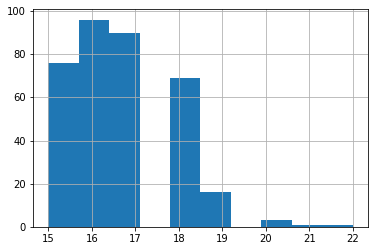

In [460]:
edu_df.age.hist()

In [461]:
edu_df[edu_df.age.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


- Преобладающее количество исследуемых студентов находятся в возрасте от 15 до 18 лет
- Непредусмотренные значения (выбросы) отсутствуют
- Незаполненые ячейки отсутствуют

#### Рассмотрим столбец "absenses"

In [464]:
edu_df.absences.value_counts()

0.0      74
2.0      60
4.0      52
6.0      30
8.0      20
10.0     17
12.0     12
14.0     12
3.0       7
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences, dtype: int64

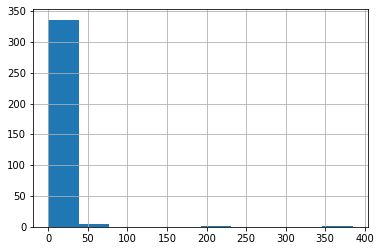

In [465]:
edu_df.absences.hist()

In [471]:
edu_df[edu_df.absences.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,15,R,GT3,T,2.0,4.0,services,health,course,mother,...,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,16,U,GT3,T,4.0,4.0,services,teacher,other,father,...,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,...,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,16,R,GT3,T,4.0,4.0,teacher,teacher,course,mother,...,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
172,17,U,GT3,T,4.0,4.0,teacher,other,reputation,mother,...,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,...,yes,yes,yes,no,4.0,4.0,4.0,1.0,NaN,75.0
227,17,U,LE3,no data,2.0,3.0,services,services,reputation,father,...,no,yes,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,17,U,GT3,T,2.0,1.0,other,other,course,mother,...,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,18,R,LE3,no data,3.0,4.0,other,other,reputation,mother,...,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0
352,18,U,LE3,T,1.0,3.0,at_home,services,course,mother,...,yes,no,yes,yes,4.0,3.0,3.0,3.0,NaN,40.0


Видим, что основное распределение лежит между 0 и 50 пропущенными занятиями и есть потенциальные выбросы(об этом нам говорит здравый смысл. Например, в году менее 385 дней).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

percentile(25) -1.5*IQR : percentile(75)+1.5*IQR,
где IQR = percentile(75) - percentile(25)

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-10.0, 20.0].


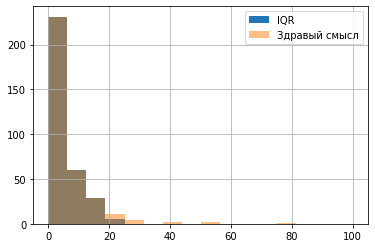

In [470]:
median = edu_df.absences.median()
IQR = edu_df.absences.quantile(0.75) - edu_df.absences.quantile(0.25)
perc25 = edu_df.absences.quantile(0.25)
perc75 = edu_df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 2*IQR, l=perc75 + 2*IQR))
edu_df.absences.loc[edu_df.absences.between(perc25 - 2*IQR, perc75 + 2*IQR)].hist(bins=16, range=(0, 100),
                                                                                  label='IQR')
edu_df.absences.loc[edu_df.absences <= 365].hist(alpha=0.5, bins=16, range=(0, 100),
                                                 label='Здравый смысл')
plt.legend()

Стандартные границы оказались слишком малы в данном случае и мы расширили границы выбросов до 2-х IQR. Такую операцию нам позволила сделать диаграмма здравого смысла. Например пропуск 20 занятий на является неожиданным значением.

In [472]:
edu_df = edu_df.loc[edu_df.absences <= 20]

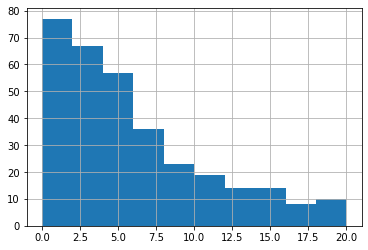

In [473]:
edu_df.absences.hist()

In [474]:
edu_df[edu_df.absences.isnull()]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


## Проведем корреляционный анализ для числовых параметров
#### Числовыми параметрами будем считать:
- возраст
- количество пропусков занятий
- балл экзамена

In [475]:
edu_df_numeric = edu_df[['age', 'absences', 'score']]
edu_df_numeric

,age,absences,score
0,18,6.0,30.0
1,17,4.0,30.0
2,15,10.0,50.0
3,15,2.0,75.0
4,16,4.0,50.0
...,...,...,...
388,18,0.0,40.0
391,17,3.0,80.0
392,21,3.0,35.0
393,18,0.0,50.0


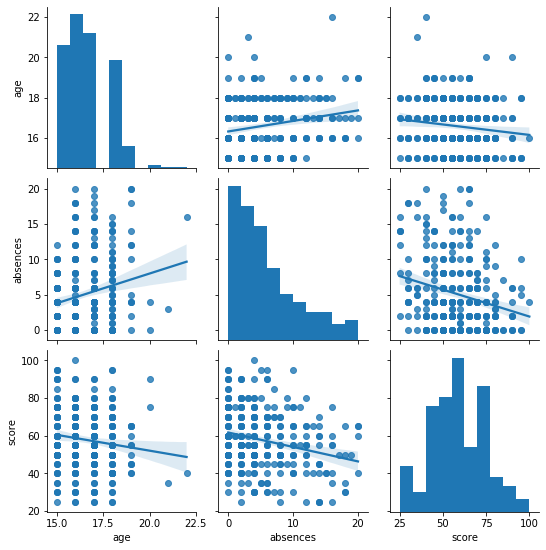

In [476]:
sns.pairplot(edu_df_numeric, kind='reg')

Используем для наглядности матрицу корреляций

In [477]:
edu_df_numeric.corr()

,age,absences,score
age,1.000000,0.20953,-0.131938
absences,0.209530,1.00000,-0.242220
score,-0.131938,-0.24222,1.000000


### Исходя из полученных данных можно сделать следующие выводы:
- С увеличением количества пропусков снижается балл за экзамен
- При этом количество пропусков занятий увеличивается с возрастом. Это возможно связано с бОльшим количеством семейных обязанностей или романтических отношений

## Анализ номинативных переменных
Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения балла в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных)

Номинативные переменные, которые осталось рассмотреть: address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health

In [502]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.boxplot(x=column, y='score',
                data=edu_df.loc[edu_df.loc[:, column].isin(
                    edu_df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=100)
    ax.set_title('Boxplot for ' + column)
    plt.show()

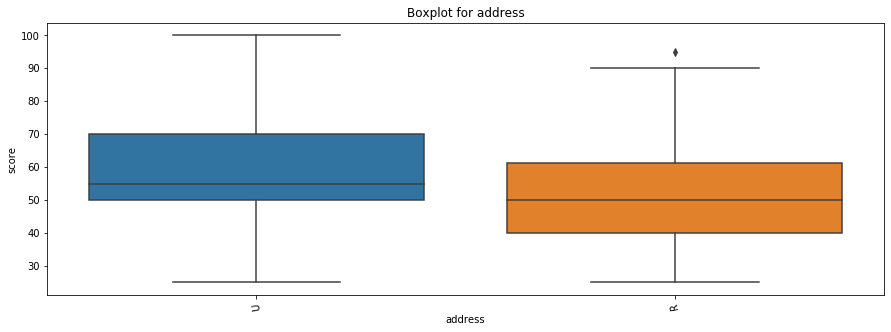

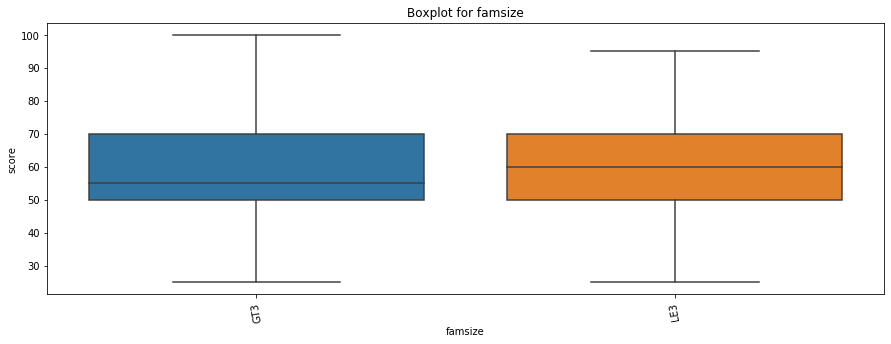

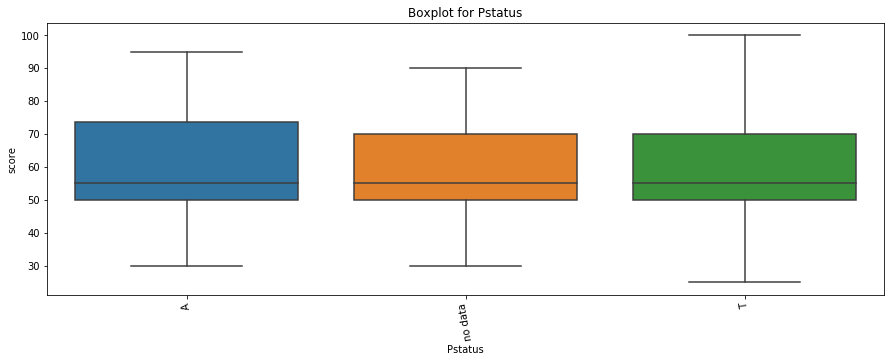

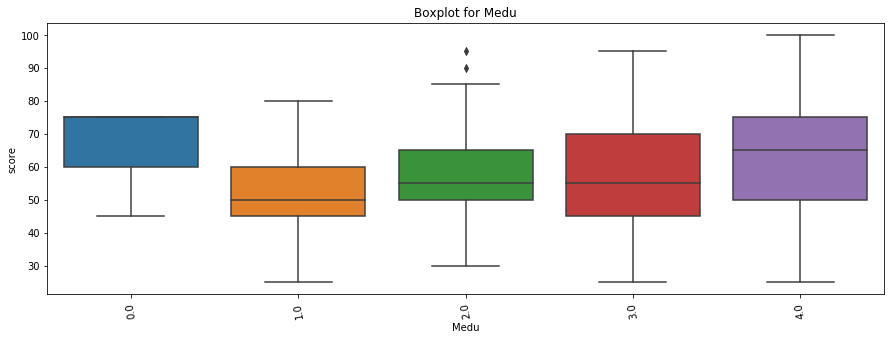

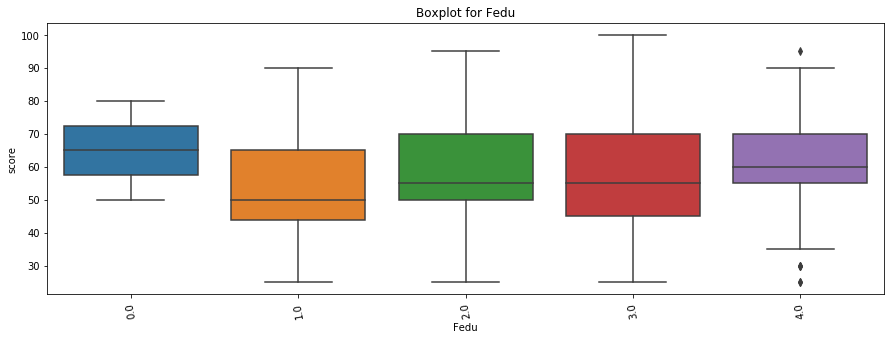

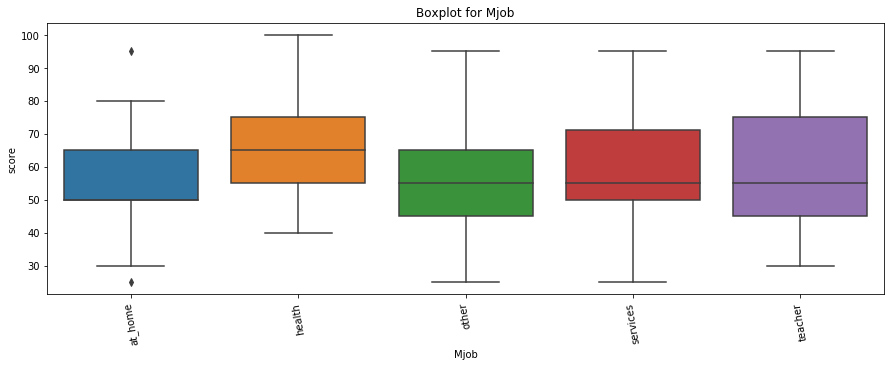

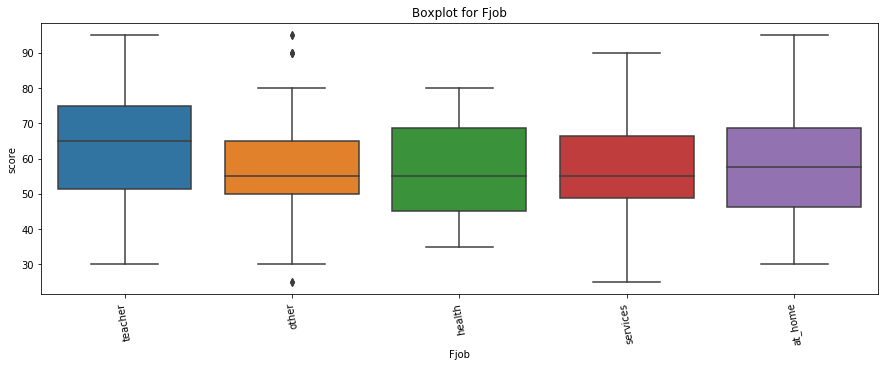

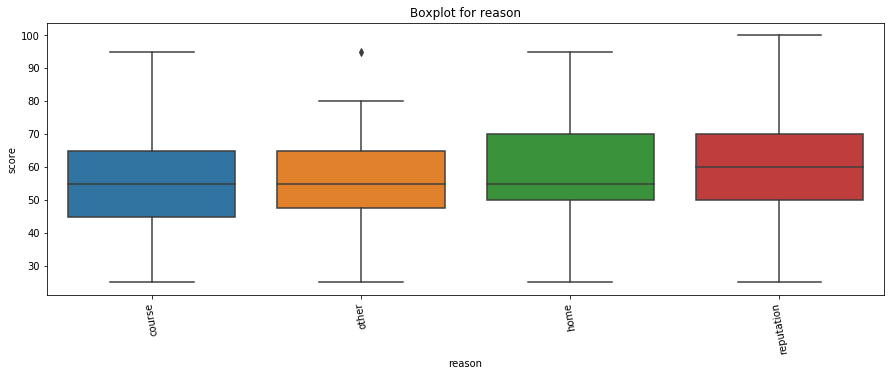

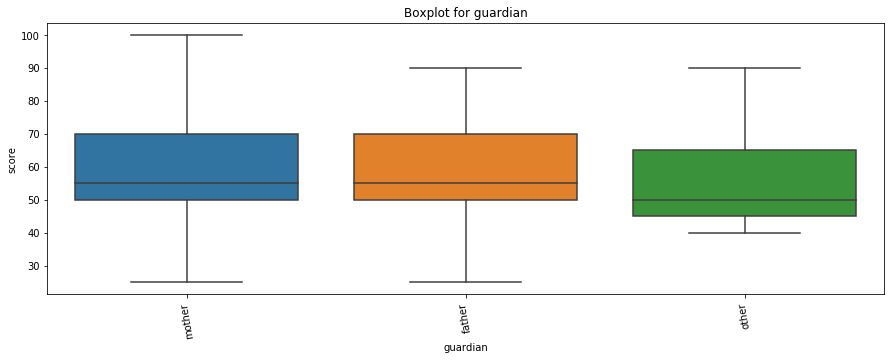

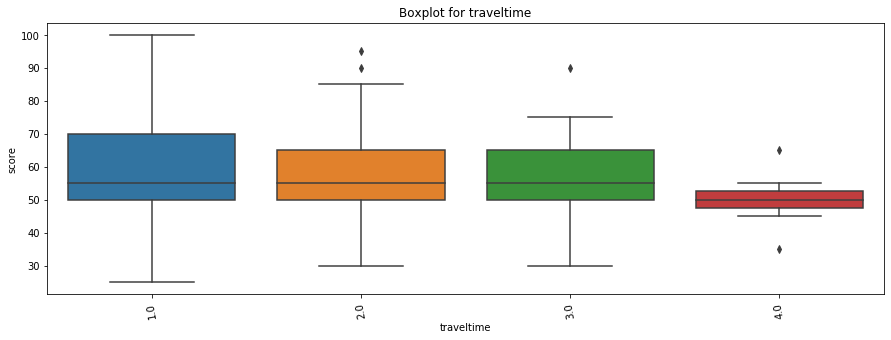

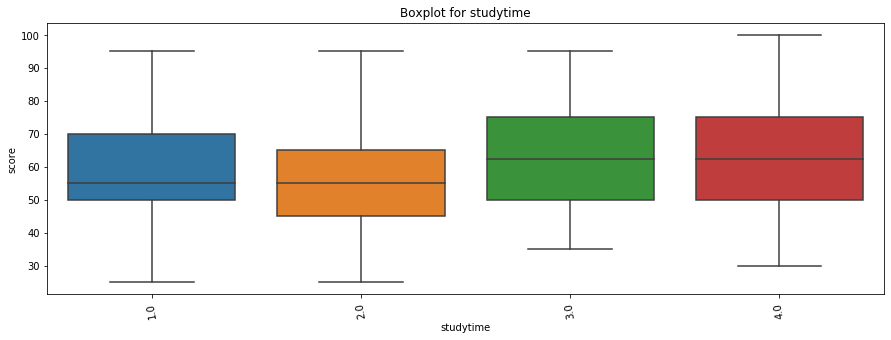

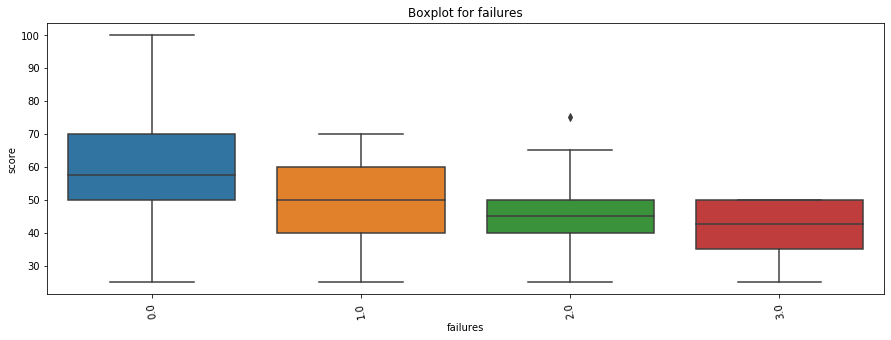

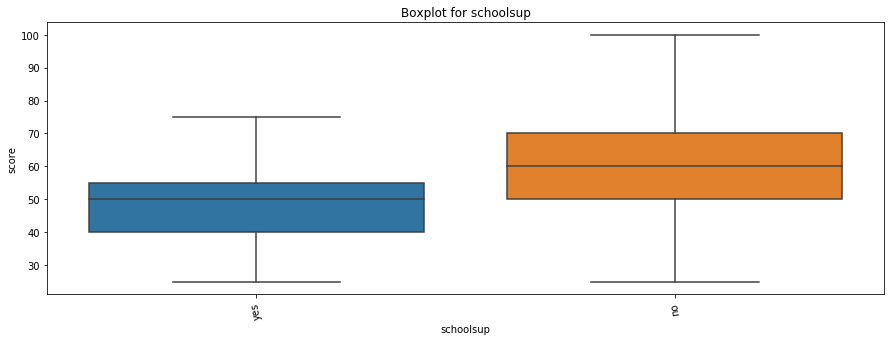

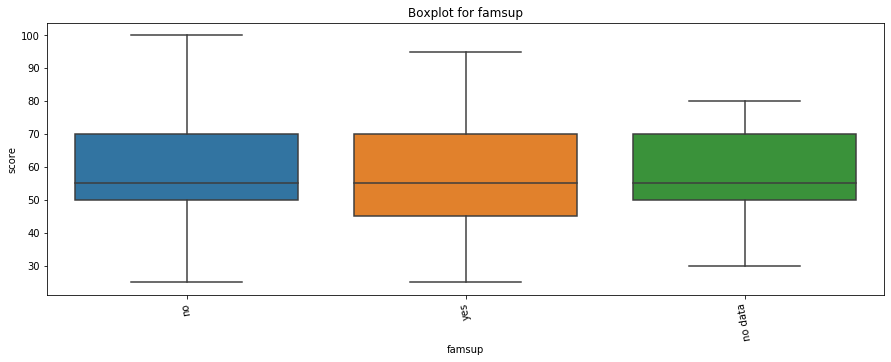

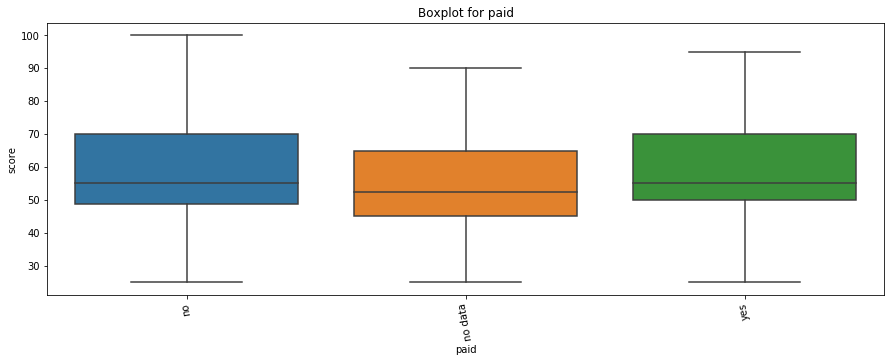

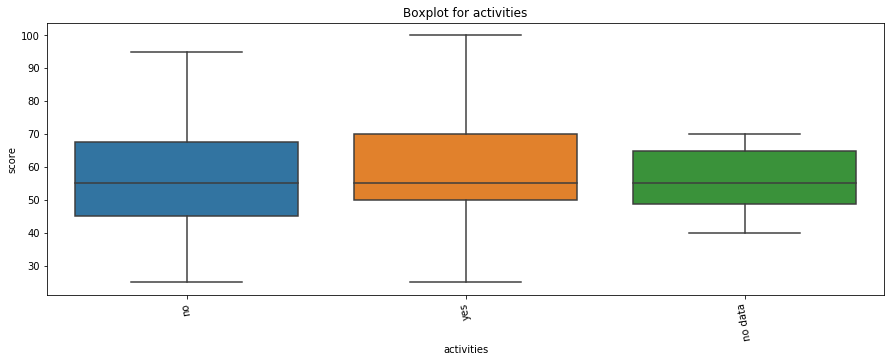

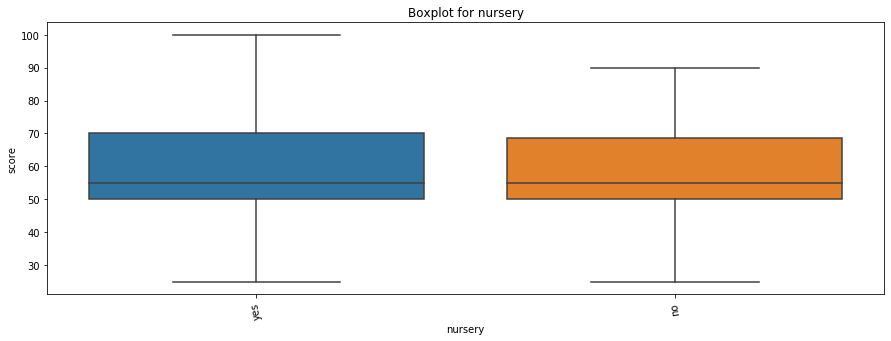

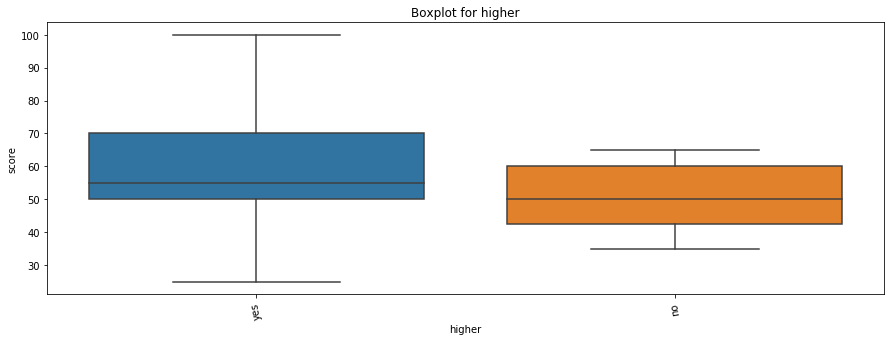

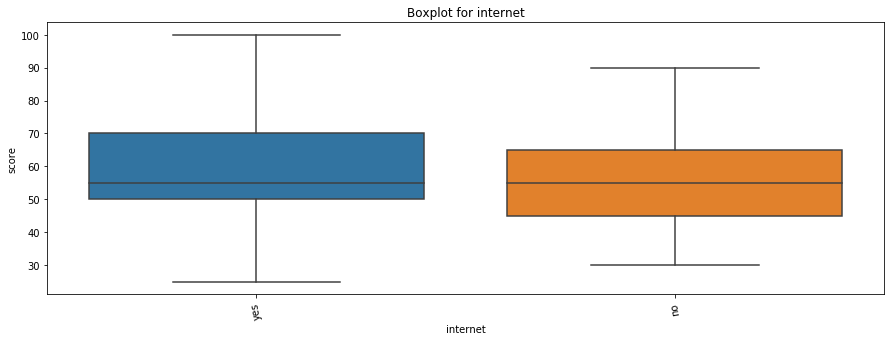

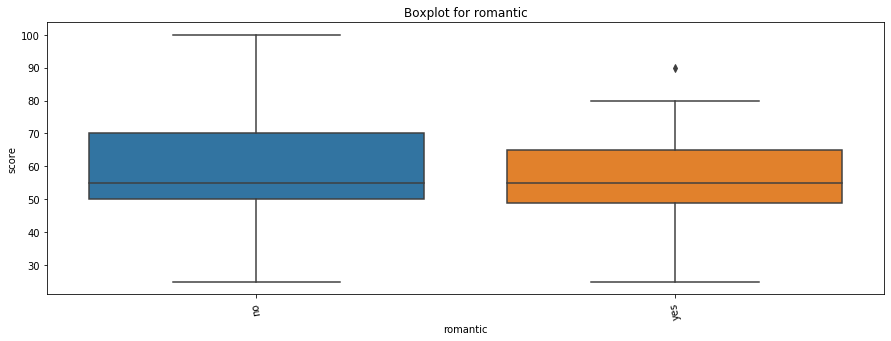

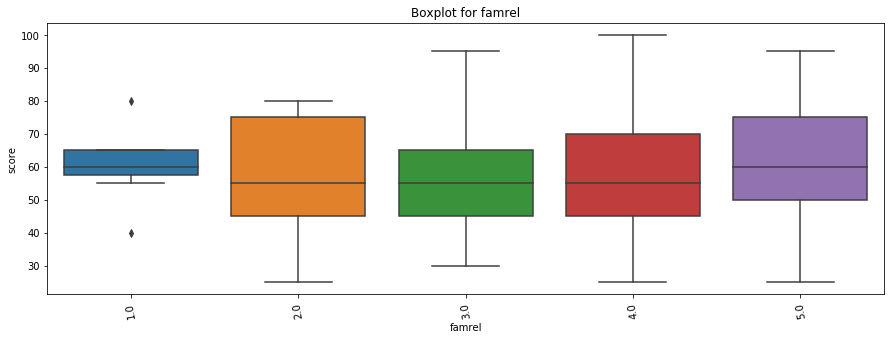

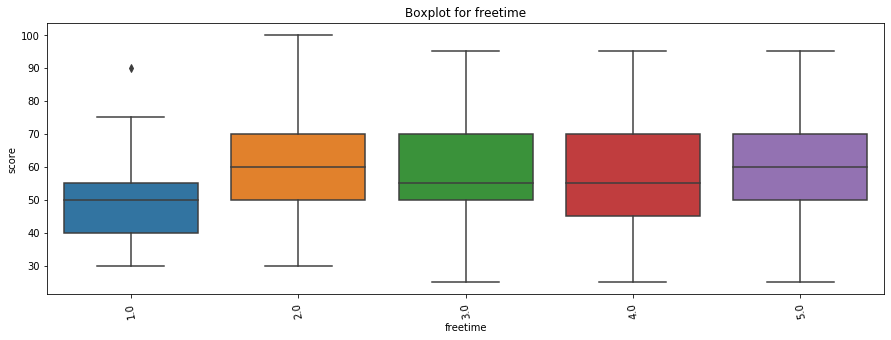

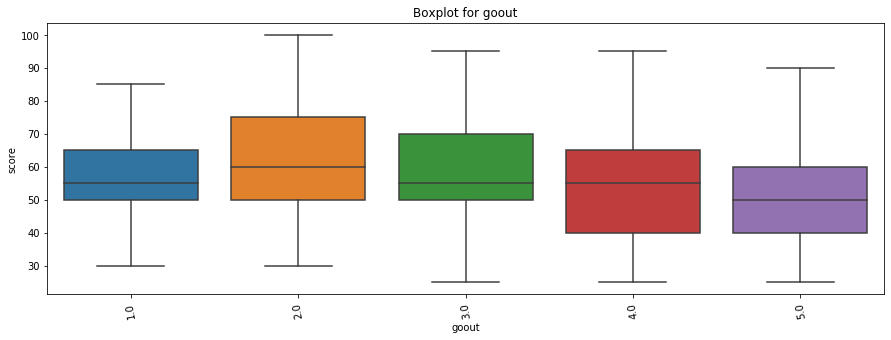

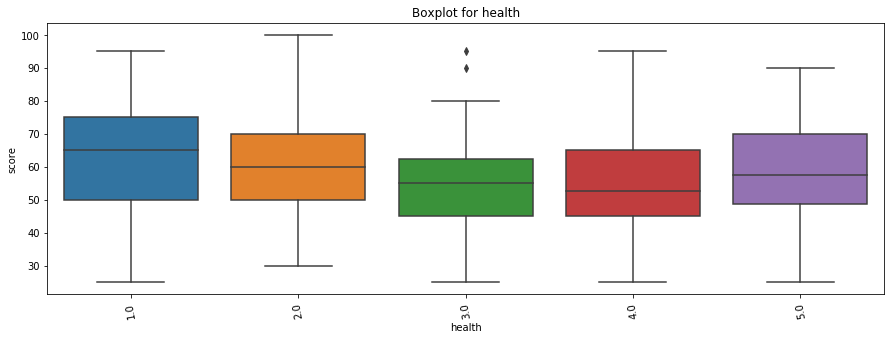

In [504]:
for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
            'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента (alhpa = 0.1, так как выборка менее 400). Проверим нулевую гипотезу о том, что распределения баллов по различным параметрам неразличимы:

In [511]:
def get_stat_dif(column):
    cols = edu_df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(edu_df.loc[edu_df.loc[:, column] == comb[0], 'score'],
                     edu_df.loc[edu_df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [512]:
for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
            'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


### По результатам анализа номинативных переменных видно, что на балл по математике влияют следующие параметры:
- место проживания студента
- образование матери
- образование отца
- работа матери
- время затрачиваемое на обучение
- количество внеучебных неудач
- дополнительная образовательная поддержка
- количество проводимого времени с друзьями

### Сформируем массив для построения модели:

In [515]:
edu_df_for_model = edu_df.loc[:, ['age', 'absences', 'address', 'Medu', 'Fedu', 'Mjob', 'studytime', 'failures',
                                  'schoolsup', 'goout', 'score']]
edu_df_for_model.head()

,age,absences,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,goout,score
0,18,6.0,U,4.0,4.0,at_home,2.0,0.0,yes,4.0,30.0
1,17,4.0,U,1.0,1.0,at_home,2.0,0.0,no,3.0,30.0
2,15,10.0,U,1.0,1.0,at_home,2.0,3.0,yes,2.0,50.0
3,15,2.0,U,4.0,2.0,health,3.0,0.0,no,2.0,75.0
4,16,4.0,U,3.0,3.0,other,2.0,0.0,no,2.0,50.0


In [516]:
edu_df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        325 non-null    int64  
 1   absences   325 non-null    float64
 2   address    325 non-null    object 
 3   Medu       325 non-null    float64
 4   Fedu       305 non-null    float64
 5   Mjob       325 non-null    object 
 6   studytime  325 non-null    float64
 7   failures   325 non-null    float64
 8   schoolsup  325 non-null    object 
 9   goout      325 non-null    float64
 10  score      325 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 40.5+ KB


# Общие выводы:

Итак, в результате EDA для анализа влияния параметров жизнедеятельности и социального статуса студентов на итоговый балл по математике были получены следующие выводы:

- В данных присутствовало достаточно большое количество пустых значений, только в 3-х столбцах все данные были заполены.
- Выбросы найдены только в столбцах: количество пропущенных занятий, а также ошибочно введенные данные в номинативных переменных, которые были исправлены.
- Найденая корреляция в числовых переменных может говорить о том, что с увеличением количества пропусков снижается балл за экзамен и количество пропусков занятий увеличивается с возрастом. 
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'age', 'absences', 'address', 'Medu', 'Fedu', 'Mjob', 'studytime', 'failures', 'schoolsup', 'goout', 'score'.